In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Q4)  What is the relationship between sick leave and Job Title (PersonType)?

In [2]:
df = pd.read_csv(r"C:\Users\sebsj\Documents\Computer Science\GenerationDataAnalyst\InterimProject\analysis\Q4_person_type_sick_leave_job_title.csv",
                 index_col="BusinessEntityID")
print(df.shape)
df.head()

(19972, 3)


,PersonType,JobTitle,SickLeaveHours
BusinessEntityID,,,
1,EM,Chief Executive Officer,69.0
2,EM,Vice President of Engineering,20.0
3,EM,Engineering Manager,21.0
4,EM,Senior Tool Designer,80.0
5,EM,Design Engineer,22.0


The different PersonTypes are: IN, EM, SP, SC, VC, GC
- SC = Store Contact, 
- IN = Individual (retail) customer, 
- SP = Sales person,
- EM = Employee (non-sales),
- VC = Vendor contact,
- GC = General contact

We will explore the sick leave hours for each PersonType, first looking at mean and spread of data:

In [3]:
# not every PersonType will have SickLeaveHours (customer) 
# sickLeaveHours_avg = df.groupby("PersonType")["SickLeaveHours"].mean()
df_clean = df.dropna(subset=["SickLeaveHours"])
print(df_clean.shape)

(290, 3)


In [4]:
def pct25(column):
    return column.quantile(0.25)

def pct50(column):
    return column.quantile(0.5)

def pct75(column):
    return column.quantile(0.75)

In [30]:
agg_list = [np.mean,np.std, np.sum, pct25, pct50, pct75]
sickLeaveHours_avg = df_clean.groupby("PersonType")["SickLeaveHours"].agg(agg_list)
sickLeaveHours_avg

,mean,std,sum,pct25,pct50,pct75
PersonType,,,,,,
EM,46.003663,14.681796,12559.0,34.0,47.0,58.0
SP,34.117647,3.620814,580.0,31.0,34.0,37.0


The median and mean values are similar to each other. This indicates there is very little skew to the data and the data is evenly distributed. It would be more descriptive to look at a boxplot: 

(0.0, 40.0)

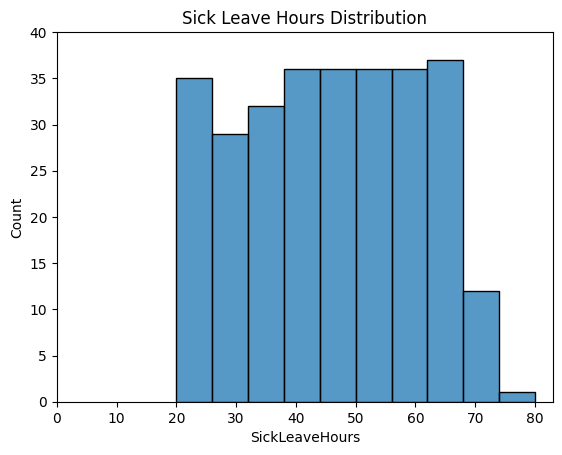

In [6]:
# plt.style.use("ggplot")
ax = sns.histplot(x=df_clean["SickLeaveHours"])
ax.set_title("Sick Leave Hours Distribution")
ax.set_xlim(xmin=0)
ax.set_ylim(ymax=40)

In [93]:
# separate out sales and employee (non-sales)
em_sick_leave = df_clean[df_clean["PersonType"] == "EM"]
print(em_sick_leave.shape)
sp_sick_leave = df_clean[df_clean["PersonType"] == "SP"]
print(sp_sick_leave.shape)

(273, 3)
(17, 3)


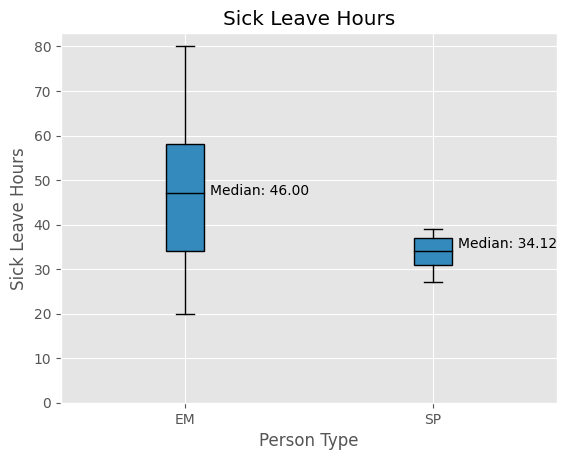

In [94]:
plt.style.use("ggplot")
em_mean = em_sick_leave["SickLeaveHours"].mean()
sp_mean = sp_sick_leave["SickLeaveHours"].mean()

labels=["EM","SP"]
fig, ax = plt.subplots()
bplot1 = ax.boxplot([em_sick_leave["SickLeaveHours"], sp_sick_leave["SickLeaveHours"]],
                    patch_artist=True, # fill with colour
                    labels=labels
                    )

for median in bplot1['medians']:
    median.set_color('black')

plt.text(1.1, em_mean, f'Median: {em_mean:.2f}', fontsize=10, ha='left', va='bottom', color='black')
plt.text(2.10, sp_mean, f'Median: {sp_mean:.2f}', fontsize=10, ha='left', va='bottom', color='black')
plt.title("Sick Leave Hours")
plt.xlabel("Person Type")
plt.ylabel("Sick Leave Hours")
plt.ylim(0)
plt.show()

This box plot compares the distribution of sick leave hours for EM and SP employees. Both distributions are relatively symmetric, with no outliers. This suggests the majority of sick leave hours fall within the interquartile range for both employee groups. 

There is a noticeable difference when looking at the spread of sick leave hours between the two groups. EM employees have a wider spread of sick leave hours and a higher median of 46 hours, indicating that half of the EM employees take at least 46 hours of sick leave. ON the other hand, SP employees show a smaller spread in sick leave hours around a median value of 34.12 hours. This suggests that SP employees take fewer sickl leave hours compared to their EM counterparts.

These findings may indicate differences in sick leave policies between the two employee groups.

Probability for EM employees to take between 23 to 70 hours of sick leave: 0.9304029304029323
Probability for SP employees to take between 30 to 40 hours of sick leave: 0.9411764705882527


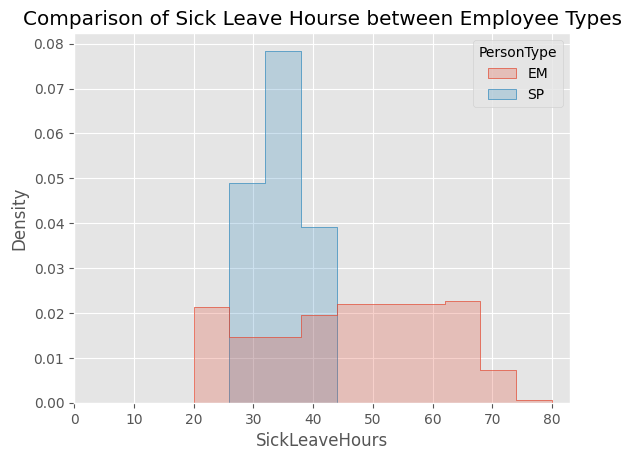

In [92]:
# plt.style.use("ggplot")
ax = sns.histplot(data=df_clean, 
                  x="SickLeaveHours",
                  hue="PersonType",
                  element="step",
                  stat='density',
                  common_norm=False, kde=False)
ax.set_title("Comparison of Sick Leave Hourse between Employee Types")
ax.set_xlim(xmin=0)

em_density, bins = np.histogram(df_clean[df_clean['PersonType'] == 'EM']['SickLeaveHours'], bins=100, density=True)
em_prob = np.sum(em_density[(bins[:-1] >= 23) & (bins[:-1] <= 70)]) * np.diff(bins)[0]
print("Probability for EM employees to take between 23 to 70 hours of sick leave:", em_prob)

sp_density, bins = np.histogram(df_clean[df_clean['PersonType'] == 'SP']['SickLeaveHours'], bins=100, density=True)
sp_prob = np.sum(sp_density[(bins[:-1] >= 30) & (bins[:-1] <= 40)]) * np.diff(bins)[0]
print("Probability for SP employees to take between 30 to 40 hours of sick leave:", sp_prob)

This histogram illustrates the distribution of sick leave hours for two employee types: Employee non-sales (EM) and Sales person. The sick leave hours have been normalised to directly compare between the two groups.

Focusing on the histogram for EM employees, it has a nearly uniform distribution of sick leave hours with the range of 20 to 70 hours. The probability of an EM employee taking between 23 to 70 hours of sick leave is 93.04%, this demonstrates that a large proportion of EM emplyees tend to take sick leave within this range. 

In contrast, the histogram for SP employees shows a more concentrated distribution of sick leave hours, with 94.12% of SP employees falling between 30 to 40 hours. This indicates that SP employees are more likely to take less sick leave hours compared to their EM employees. However, the sample size of SP employees is only 17, while there are 273 EM employees. The small sample size of SP employees limits the robustness of sick leave in this group.

## Job Titles

As there are many job titles, lets look into the jobs with highest sick leave hours. 

In [110]:
df_clean.sort_values("SickLeaveHours", ascending=False)

,PersonType,JobTitle,SickLeaveHours
BusinessEntityID,,,
4,EM,Senior Tool Designer,80.0
1,EM,Chief Executive Officer,69.0
124,EM,Stocker,69.0
88,EM,Production Technician - WC10,69.0
92,EM,Production Technician - WC10,69.0
...,...,...,...
97,EM,Production Technician - WC50,20.0
234,EM,Chief Financial Officer,20.0
141,EM,Production Technician - WC20,20.0


In [116]:
job_title_avg = df_clean.groupby("JobTitle")["SickLeaveHours"].agg(['count', np.mean, np.std]).sort_values("mean", ascending=False)
job_title_avg

,count,mean,std
JobTitle,,,
Chief Executive Officer,1,69.000000,NaN
Stocker,3,68.333333,0.57735
Shipping and Receiving Clerk,2,67.000000,0.00000
Maintenance Supervisor,1,66.000000,NaN
Shipping and Receiving Supervisor,1,66.000000,NaN
...,...,...,...
Design Engineer,3,22.333333,0.57735
Engineering Manager,1,21.000000,NaN
Senior Design Engineer,1,21.000000,NaN


The chief exectuive officer has  . The production technicians seems 